In [1]:
import sys
import sklearn


In [2]:
from pathlib import Path
# Define the default font sizes to make the figures prettier:
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images" / "LAB5_comp"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
X, y = mnist.data, mnist.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Random Forest training time: 21.9624 seconds
Accuracy: 0.9673
Precision: 0.9671
Recall: 0.9671
F1-score: 0.9671
SVM training time: 108.2521 seconds
Accuracy: 0.9824
Precision: 0.9824
Recall: 0.9823
F1-score: 0.9823
SGD training time: 77.0152 seconds
Accuracy: 0.8717
Precision: 0.8801
Recall: 0.8680
F1-score: 0.8699
k-NN training time: 0.0701 seconds
Accuracy: 0.9731
Precision: 0.9736
Recall: 0.9728
F1-score: 0.9731


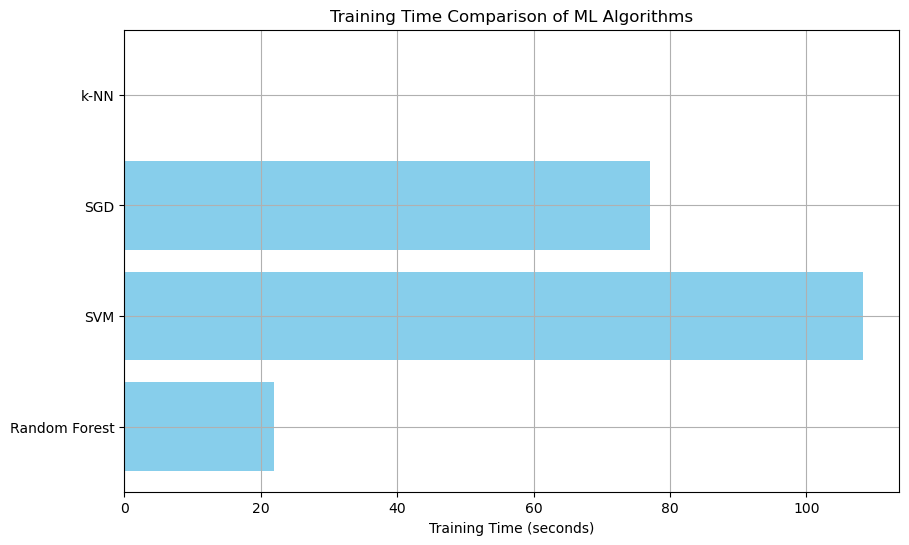

In [7]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf',C= 374.6401188473625, gamma= 'scale', random_state=42),
    "SGD": SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=4, weights='distance')
}

# Dictionary to store training times
training_times = {}
results = {}

# Evaluate training time for each classifier
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)  # Train the model
    end_time = time.time()
    
    training_time = end_time - start_time
    training_times[name] = training_time
    print(f"{name} training time: {training_time:.4f} seconds")
    y_pred = clf.predict(X_test)
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    # Store the results for comparison
    results[clf] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred)
    }



# Print the performance metrics for the current kernel



# Plot the training times
names = list(training_times.keys())
times = list(training_times.values())

plt.figure(figsize=(10, 6))
plt.barh(names, times, color='skyblue')  # Horizontal bar chart
plt.xlabel('Training Time (seconds)')
plt.title('Training Time Comparison of ML Algorithms')
plt.grid(True)

# Display the plot
plt.show()

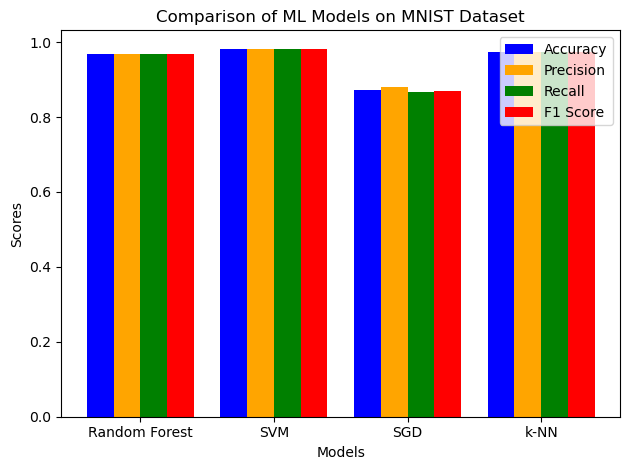

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'SVM', 'SGD', 'k-NN']
accuracy = [0.9673, 0.9824, 0.8717, 0.9731]
precision = [0.9671, 0.9824, 0.8801, 0.9736]
recall = [0.9671, 0.9823, 0.8680, 0.9728]
f1_score = [0.9671, 0.9823, 0.8699, 0.9731]

# Setting the bar width and positions
bar_width = 0.2
x = np.arange(len(models))

# Create bars
plt.bar(x, accuracy, width=bar_width, label='Accuracy', color='blue')
plt.bar(x + bar_width, precision, width=bar_width, label='Precision', color='orange')
plt.bar(x + 2 * bar_width, recall, width=bar_width, label='Recall', color='green')
plt.bar(x + 3 * bar_width, f1_score, width=bar_width, label='F1 Score', color='red')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of ML Models on MNIST Dataset')
plt.xticks(x + bar_width * 1.5, models)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

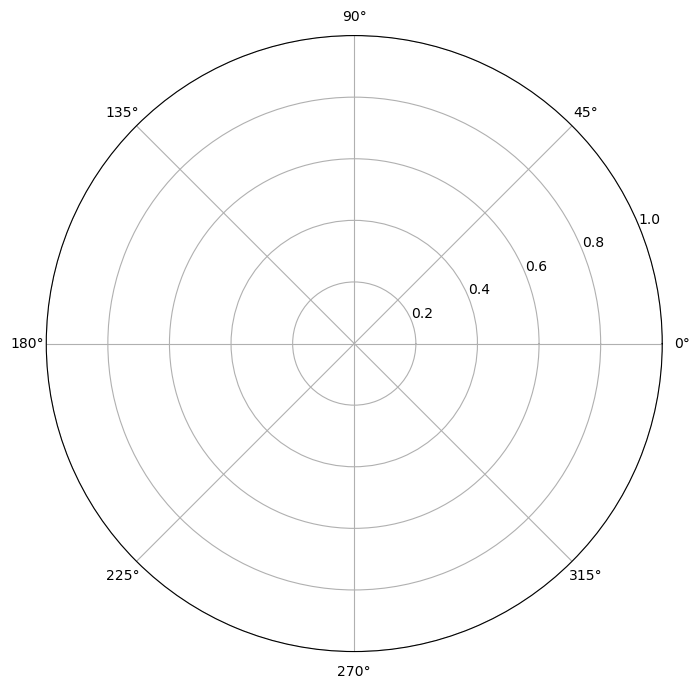

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time']
num_vars = len(labels)

# Model names
models = ['Random Forest', 'SVM', 'SGD', 'k-NN']

# Performance metrics
accuracy = [0.9673, 0.9824, 0.8717, 0.9731]
precision = [0.9671, 0.9824, 0.8801, 0.9736]
recall = [0.9671, 0.9823, 0.8680, 0.9728]
f1_score = [0.9671, 0.9823, 0.8699, 0.9731]
training_time = [21.9624, 108.2521, 77.0152, 0.0701]  # In seconds

# Invert training time for better visualization (lower is better)
max_time = max(training_time)
inverted_time = [max_time - t for t in training_time]  # Invert training time

# Combine the metrics into a single array for each model
metrics = [accuracy, precision, recall, f1_score, inverted_time]

# Create a radar plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the loop for angles and metrics
for i in range(len(metrics)):
    metrics[i] += [metrics[i][0]]  # Close the loop
angles += angles[:1]  # Close the loop for angles

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
for i, model in enumerate(models):
    stats = metrics[i]  # Get the model's stats
    ax.fill(angles, stats, alpha=0.25, label=model)  # Fill the area
    ax.plot(angles, stats, linewidth=2)  # Outline the area

# Add labels and title
ax.set_yticklabels([])  # Remove y-tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Plot of ML Models Performance on MNIST Dataset', size=16, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.tight_layout()
plt.show()


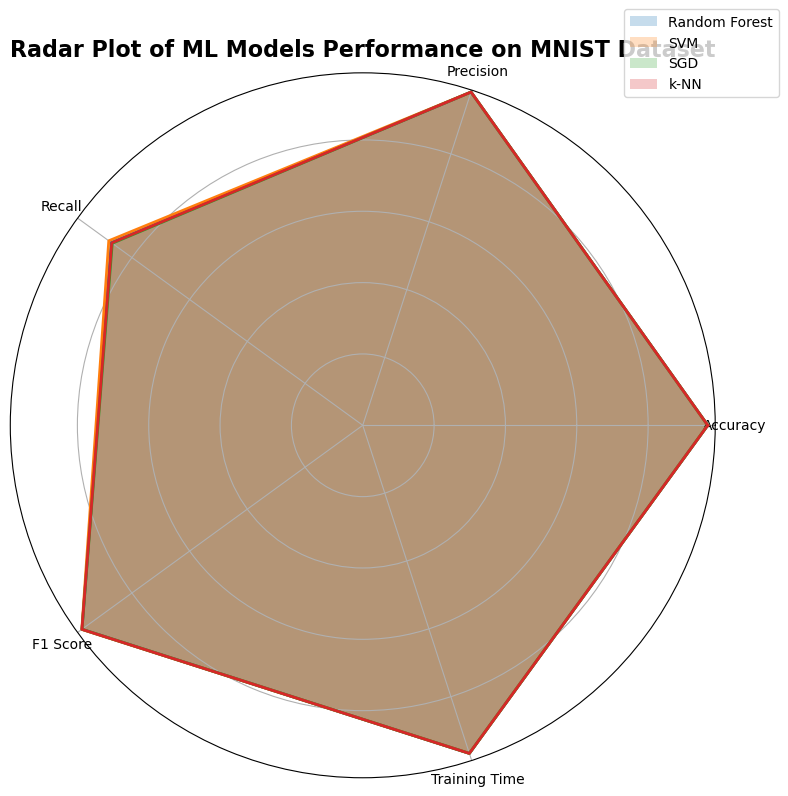

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time']
num_vars = len(labels)

# Model names
models = ['Random Forest', 'SVM', 'SGD', 'k-NN']

# Performance metrics
accuracy = [0.9673, 0.9824, 0.8717, 0.9731]
precision = [0.9671, 0.9824, 0.8801, 0.9736]
recall = [0.9671, 0.9823, 0.8680, 0.9728]
f1_score = [0.9671, 0.9823, 0.8699, 0.9731]
training_time = [21.9624, 108.2521, 77.0152, 0.0701]  # In seconds

# Invert training time for better visualization (lower is better)
max_time = max(training_time)
inverted_time = [max_time - t for t in training_time]  # Invert training time

# Combine the metrics into a single array for each model
metrics = [accuracy, precision, recall, f1_score, inverted_time]

# Create a radar plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the loop for angles
angles += angles[:1]  # Repeat the first angle to close the circle

# Close the loop for each model's metrics
for i in range(len(metrics)):
    metrics[i] += [metrics[i][0]]  # Close the loop for each model's metrics

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
for i, model in enumerate(models):
    stats = metrics[i] + [metrics[i][0]]  # Ensure the metrics are closed
    ax.fill(angles, stats, alpha=0.25, label=model)  # Fill the area
    ax.plot(angles, stats, linewidth=2)  # Outline the area

# Add labels and title
ax.set_yticklabels([])  # Remove y-tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Plot of ML Models Performance on MNIST Dataset', size=16, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.tight_layout()
plt.show()


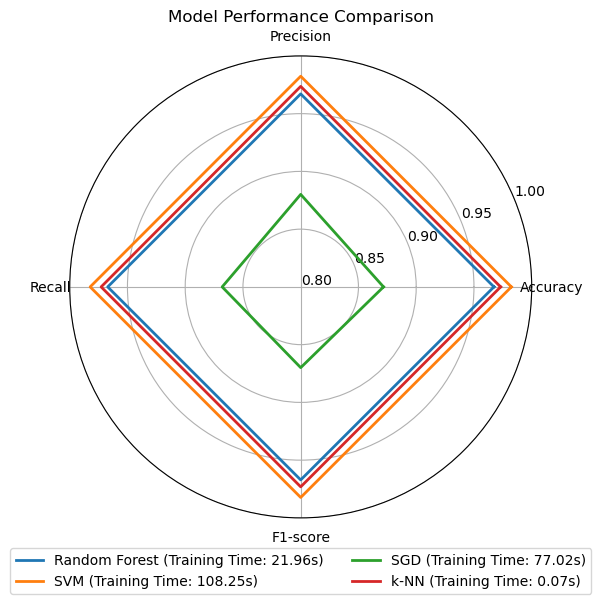

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = ['Random Forest', 'SVM', 'SGD', 'k-NN']
values = np.array([
    [0.9673, 0.9671, 0.9671, 0.9671],
    [0.9824, 0.9824, 0.9823, 0.9823],
    [0.8717, 0.8801, 0.8680, 0.8699],
    [0.9731, 0.9736, 0.9728, 0.9731]
])
training_times = [21.9624, 108.2521, 77.0152, 0.0701]

N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot each model
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, model in enumerate(model_names):
    data = values[i]
    data = np.concatenate((data, [data[0]]))
    ax.plot(angles, data, linewidth=2, label=f'{model} (Training Time: {training_times[i]:.2f}s)')

ax.set_yticks(np.arange(0.8, 1.1, 0.05))
ax.set_ylim(0.8, 1.0)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Adjust legend placement below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.title('Model Performance Comparison')



plt.title('Model Performance Comparison')
plt.show()


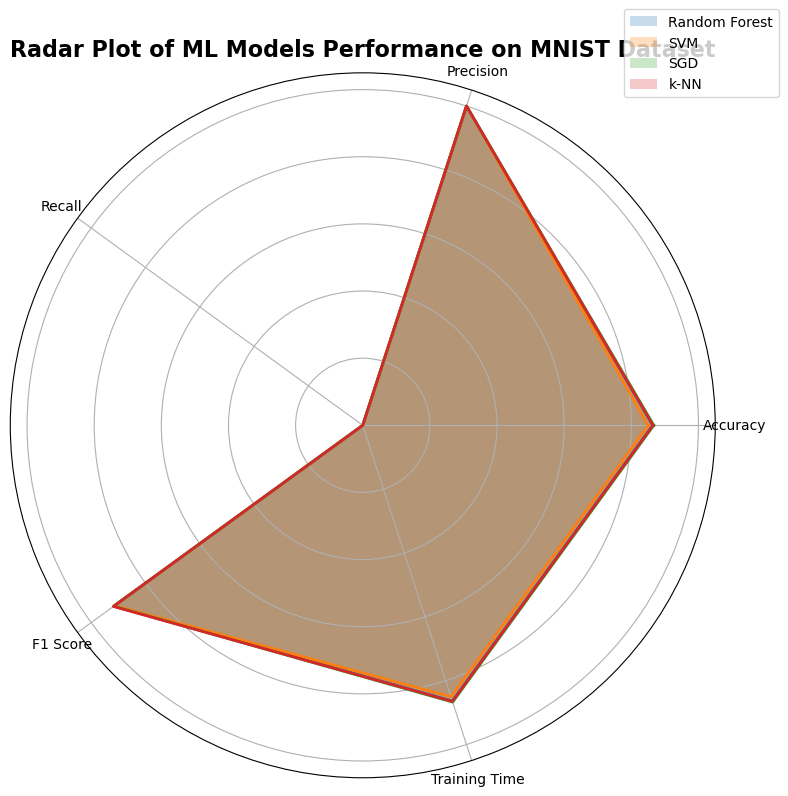

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time']
num_vars = len(labels)

# Model names
models = ['Random Forest', 'SVM', 'SGD', 'k-NN']

# Performance metrics
accuracy = [0.9673, 0.9824, 0.8717, 0.9731]
precision = [0.9671, 0.9824, 0.8801, 0.9736]
recall = [0.9671, 0.9823, 0.8680, 0.9728]
f1_score = [0.9671, 0.9823, 0.8699, 0.9731]
training_time = [21.9624, 108.2521, 77.0152, 0.0701]  # In seconds

# Invert training time for better visualization (lower is better)
max_time = max(training_time)
inverted_time = [max_time - t for t in training_time]  # Invert training time

# Combine the metrics into a single array for each model
metrics = [accuracy, precision, recall, f1_score, inverted_time]

# Normalize the metrics
def normalize(data):
    return [(x - min(data)) / (max(data) - min(data)) for x in data]

# Scale each metric to the range [0, 1]
normalized_metrics = [normalize(metric) for metric in metrics]

# Create a radar plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the loop for angles
angles += angles[:1]  # Repeat the first angle to close the circle

# Close the loop for each model's normalized metrics
for i in range(len(normalized_metrics)):
    normalized_metrics[i] += [normalized_metrics[i][0]]  # Close the loop for each model's metrics

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
for i, model in enumerate(models):
    stats = normalized_metrics[i] + [normalized_metrics[i][0]]  # Ensure the metrics are closed
    ax.fill(angles, stats, alpha=0.25, label=model)  # Fill the area
    ax.plot(angles, stats, linewidth=2)  # Outline the area

# Add labels and title
ax.set_yticklabels([])  # Remove y-tick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Plot of ML Models Performance on MNIST Dataset', size=16, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.tight_layout()
plt.show()
